<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 9.1: NN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- **NOTE**: This is a Regression problem. Consider the appropriate:
    - Activation function
    - Loss/Cost Function
    - Metrics

### Import libraries

In [10]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
%matplotlib inline
import matplotlib.pyplot as plt

In [9]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.2/236.2 MB 1.8 MB/s eta 0:00:0000:0100:03m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 1.4 MB/s eta 0:00:0000:01:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 2.1 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 992.4 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 1.5 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 3.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.0/398.0 kB 2.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 1.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 2.7

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.7/283.7 kB 3.4 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0


### Load data
Load the Diabetes dataset from **SciKit-Learn**.

In [6]:

# The diabetes dataset
diabetes = load_diabetes()

print(diabetes.data[:5]) 
print(diabetes.target[:5])  

[[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665608  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02268774 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187239  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03198764 -0.04664087]]
[151.  75. 141. 206. 135.]


In [22]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

### Prepare input data

In [11]:
X = diabetes.data  
y = diabetes.target  

# Check the shape of the data
print(X.shape, y.shape)

(442, 10) (442,)


In [27]:
diabetes.data[:5]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286131, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665608,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02268774, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187239,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03198764, -0.04664087]])

In [23]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [24]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

### Split the data (training/test)

In [12]:
# Split the data into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Create the model's architecture

In [28]:
# Create the model
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))

# Additional hidden layers
model.add(Dense(4, activation='relu'))

# Output layer (1 neuron for regression output)
model.add(Dense(1, activation='linear'))

print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 129 (516.00 B)

 Trainable params: 129 (516.00 B)

 Non-trainable params: 0 (0.00 B)

None


### Compile the model

In [14]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

### Fit the training data

In [15]:
%%time
# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 31273.7734 - mae: 159.0337 - val_loss: 22350.6230 - val_mae: 133.6252
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 30444.2305 - mae: 156.1911 - val_loss: 22191.0957 - val_mae: 133.0717
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 30630.6934 - mae: 157.2101 - val_loss: 21988.6211 - val_mae: 132.3732
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 31335.3906 - mae: 159.4767 - val_loss: 21712.8477 - val_mae: 131.4186
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 30120.3672 - mae: 154.5448 - val_loss: 21325.2246 - val_mae: 130.0813
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 29181.9629 - mae: 150.8711 - val_loss: 20760.6602 - val_mae: 128.1342
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 27506.2051 - mae: 146.5010 - val_loss: 19952.5488 - val_mae: 125.3178
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 28670.9160 - mae: 149.6054 - val_loss: 18798.8301 - v

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2974.7961 - mae: 43.9923 - val_loss: 2890.3196 - val_mae: 41.5206
Epoch 53/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2646.0137 - mae: 40.8190 - val_loss: 2900.2673 - val_mae: 41.7184
Epoch 54/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2617.2412 - mae: 40.6439 - val_loss: 2885.3767 - val_mae: 41.6331
Epoch 55/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2639.6802 - mae: 40.4646 - val_loss: 2871.0576 - val_mae: 41.4200
Epoch 56/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2868.9380 - mae: 42.5931 - val_loss: 2881.5593 - val_mae: 41.4985
Epoch 57/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2869.3516 - mae: 42.0769 - val_loss: 2874.8608 - val_mae: 41.5972
Epoch 58/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2513.7866 - mae: 39.4157 - val_loss: 2870.8821 - val_mae: 41.5763
Epoch 59/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2693.2229 - mae: 40.2951 - val_loss: 2876.8872 - val_mae: 41.5962
Epoch 60/100
9/9 ━━━━

### Create predictions

In [16]:
# Predict on the test data
y_pred = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


### Evaluate the model

In [17]:
# Evaluate the model on the test data
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)

print(f"Test MSE (Loss): {test_loss:.4f}")
print(f"Test MAE (Metric): {test_mae:.4f}")

Test MSE (Loss): 2906.9634
Test MAE (Metric): 43.1131


### Visualisation of cost

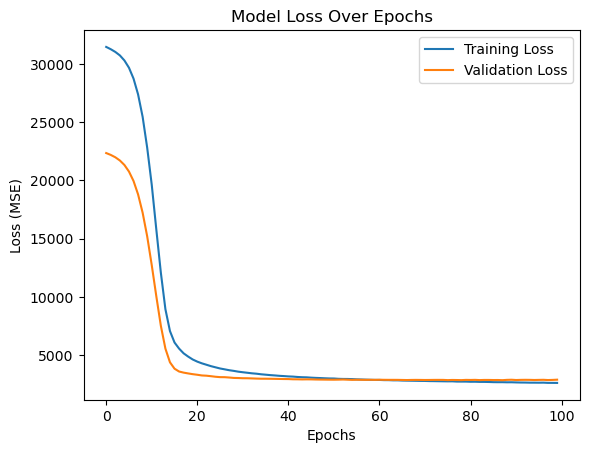

In [18]:
# Plot the loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

### Visualisation of residuals

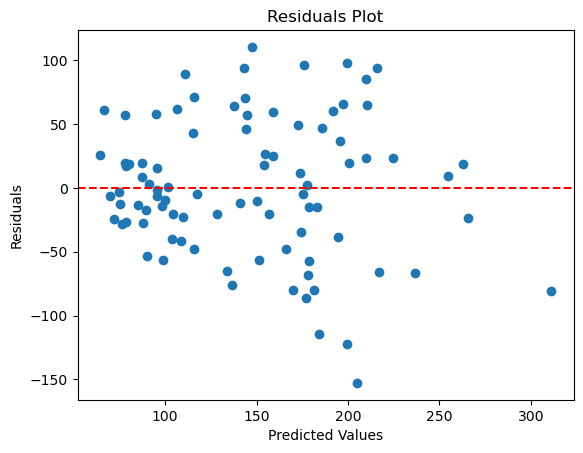

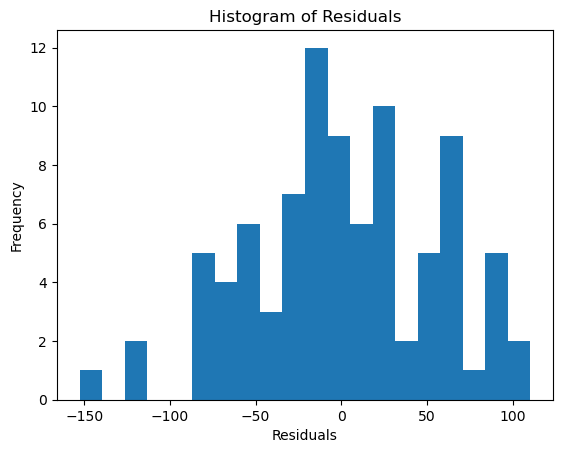

In [19]:
# Calculate residuals
residuals = y_test - y_pred.flatten()

# Plot residuals
plt.scatter(y_pred, residuals)
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Optional: Histogram of residuals
plt.hist(residuals, bins=20)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



